<a href="https://colab.research.google.com/github/mohit052003/House_Price_Prediction_Application/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline


In [ ]:
# Upgrade numpy, scipy, and seaborn to the latest versions
!pip install --upgrade numpy scipy seaborn


In [ ]:
import numpy as np
import scipy
import seaborn as sns

print(f"NumPy version: {np.__version__}")
print(f"SciPy version: {scipy.__version__}")
print(f"Seaborn version: {sns.__version__}")


NumPy version: 2.1.2
SciPy version: 1.14.1
Seaborn version: 0.13.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline


In [ ]:

# Load dataset into a Pandas DataFrame
df = pd.read_csv('/content/Mumbai.csv')  # Replace with your actual file name

# Display the first five rows
df.head()


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
# Creating a synthetic dataset
np.random.seed(42)
n_samples = 1000

df = pd.DataFrame({
    'Price': np.random.randint(100000, 500000, size=n_samples),
    'Size': np.random.randint(500, 3500, size=n_samples),
    'Bedrooms': np.random.randint(1, 6, size=n_samples),
    'Bathrooms': np.random.randint(1, 4, size=n_samples),
    'Stories': np.random.randint(1, 3, size=n_samples),
    'Garage': np.random.randint(0, 4, size=n_samples),
    'Location': np.random.choice(['Downtown', 'Suburb', 'Countryside'], size=n_samples),
    'Age': np.random.randint(0, 100, size=n_samples),
    'Has_Pool': np.random.choice([0, 1], size=n_samples)
})

df.head()


,Price,Size,Bedrooms,Bathrooms,Stories,Garage,Location,Age,Has_Pool
0,221958,1213,1,2,1,0,Countryside,15,1
1,246867,1562,3,2,2,0,Suburb,27,1
2,231932,2476,3,3,2,0,Downtown,34,0
3,465838,1796,4,3,2,1,Countryside,59,0
4,359178,1754,2,3,2,1,Countryside,44,0


In [ ]:
# Basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1000 non-null   int64 
 1   Size       1000 non-null   int64 
 2   Bedrooms   1000 non-null   int64 
 3   Bathrooms  1000 non-null   int64 
 4   Stories    1000 non-null   int64 
 5   Garage     1000 non-null   int64 
 6   Location   1000 non-null   object
 7   Age        1000 non-null   int64 
 8   Has_Pool   1000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 70.4+ KB


In [ ]:
# Statistical summary
df.describe()


,Price,Size,Bedrooms,Bathrooms,Stories,Garage,Age,Has_Pool
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,297062.61800,1969.037000,3.054000,1.981000,1.471000,1.572000,49.725000,0.498000
std,115471.59786,868.268368,1.427278,0.830258,0.499408,1.118958,29.207712,0.500246
min,100404.00000,501.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,204236.25000,1230.000000,2.000000,1.000000,1.000000,1.000000,23.750000,0.000000
50%,292894.50000,1944.000000,3.000000,2.000000,1.000000,2.000000,50.000000,0.000000
75%,397956.75000,2676.250000,4.000000,3.000000,2.000000,3.000000,76.000000,1.000000
max,499111.00000,3496.000000,5.000000,3.000000,2.000000,3.000000,99.000000,1.000000


In [ ]:
# Check for missing values
df.isnull().sum()


,0
Price,0
Size,0
Bedrooms,0
Bathrooms,0
Stories,0
Garage,0
Location,0
Age,0
Has_Pool,0


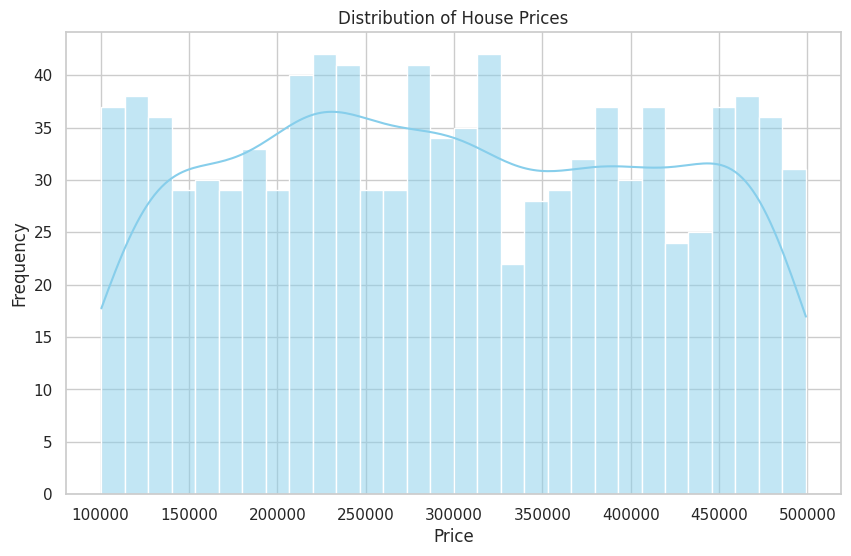

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



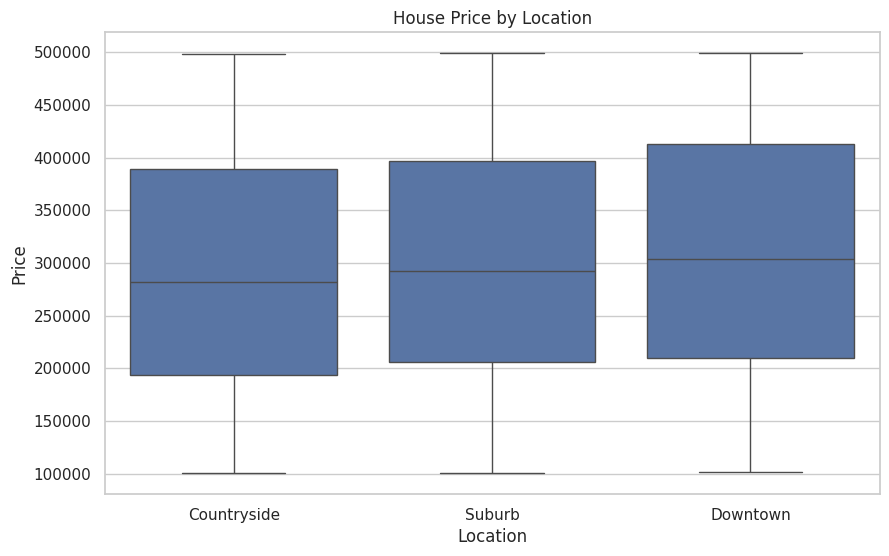

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Location', y='Price', data=df)
plt.title('House Price by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()


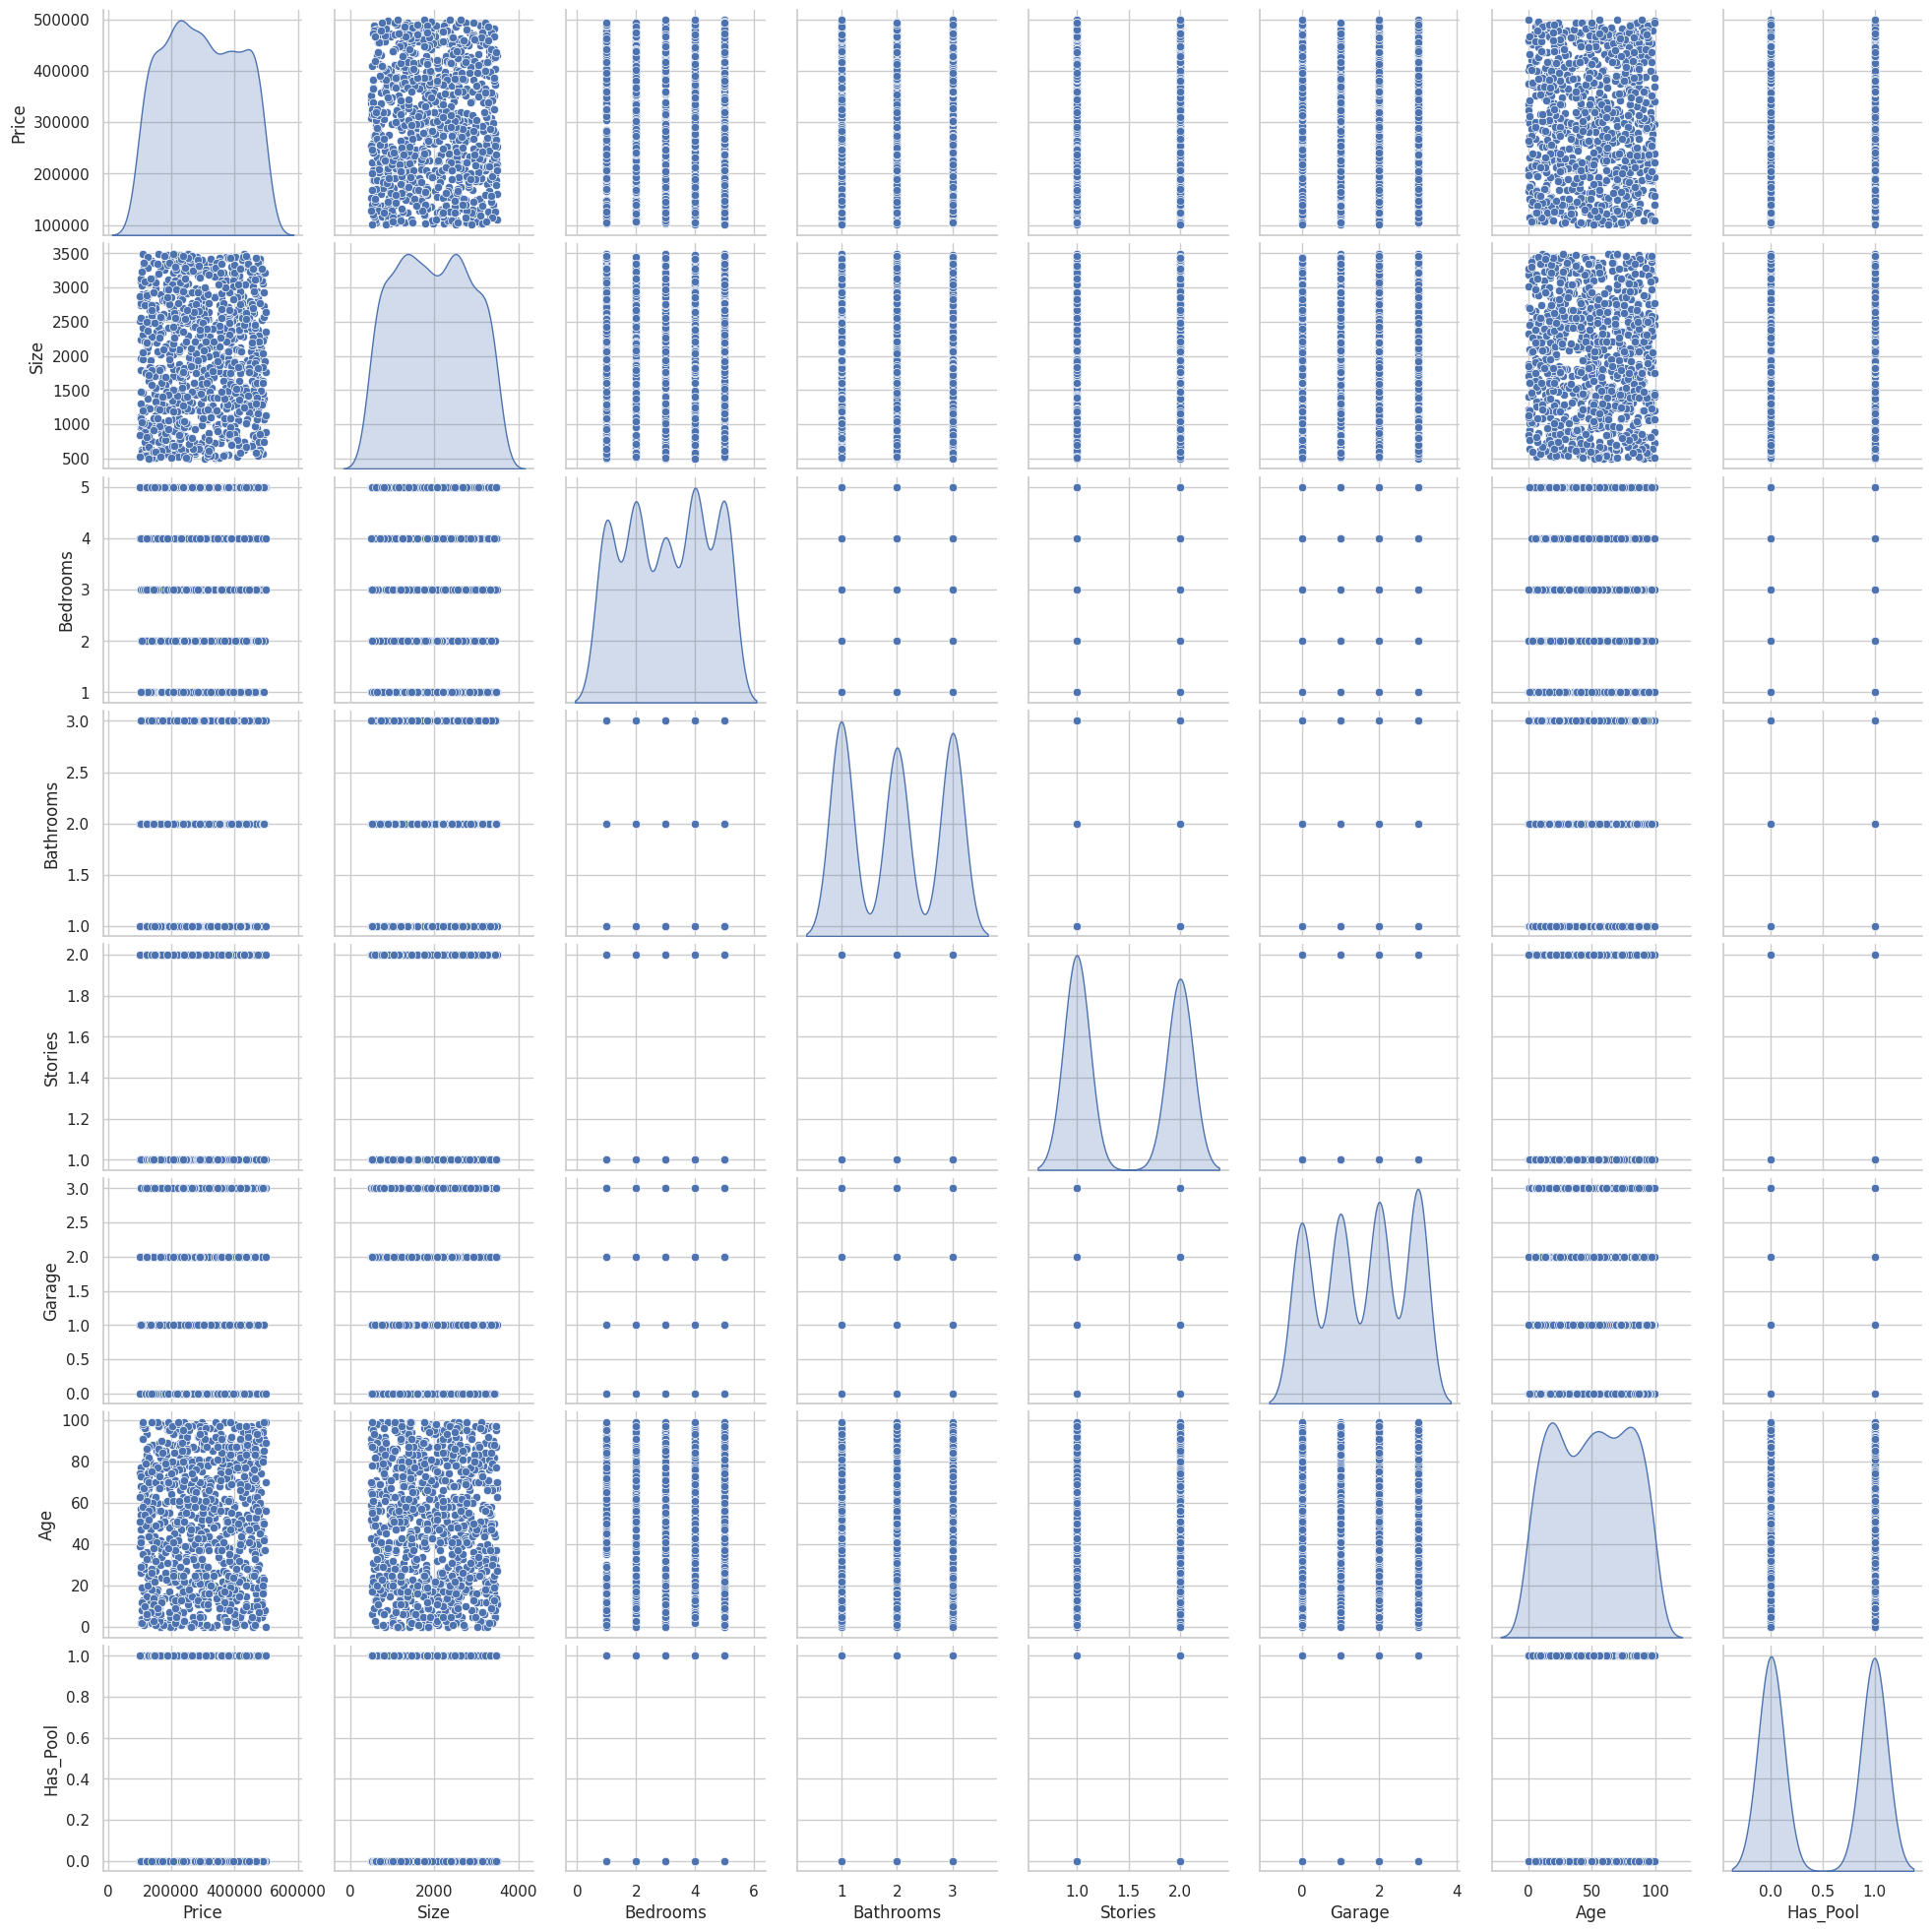

In [ ]:
sns.pairplot(df, diag_kind='kde')
plt.show()


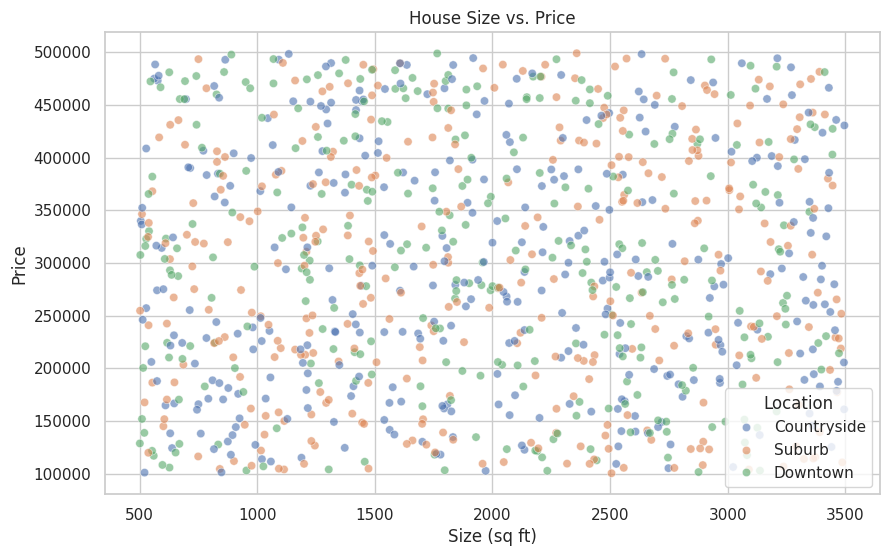

In [ ]:
# Import necessary libraries (if not done already)
import seaborn as sns
import matplotlib.pyplot as plt

# Set a more visually appealing style
sns.set(style="whitegrid")

# Create a larger figure for better visualization
plt.figure(figsize=(12, 8))

# Create a scatter plot with regression lines and enhanced visual features
scatter = sns.scatterplot(x='Size', y='Price', data=df, hue='Location',
                          palette='coolwarm', s=100, edgecolor='w', alpha=0.7)

# Adding a regression line to show trends, without hue for a single overall trend
sns.regplot(x='Size', y='Price', data=df, scatter=False, color='gray',
            line_kws={"linewidth":2, 'alpha':0.7})

# Improve the title and labels
plt.title('House Size vs. Price Across Locations', fontsize=16, fontweight='bold')
plt.xlabel('House Size (sq ft)', fontsize=14)
plt.ylabel('Price (in $)', fontsize=14)

# Add a grid for better readability
plt.grid(True)

# Display the legend with better placement and title
plt.legend(title='Location', loc='upper left', fontsize=12)

# Show the plot
plt.show()


In [ ]:
# Load the Dataset
df = pd.read_csv('/content/Mumbai.csv')

# Get the current column names
current_columns = df.columns.tolist()

# Replace specific columns if they exist in current columns
new_columns = {
    'Price': 'Price',
    'Area': 'Area',
    'Location': 'Location', # This line was indented incorrectly, moved to align with other key-value pairs
    'No. of Bedrooms': 'No.of.Bedrooms',
    'Resale': 'Resale',
    'MaintenanceStaff': 'MaintenanceStaff',
    'Gymnasium': 'Gymnasium',
    'SwimmingPool': 'Swimming',
    'LandscapedGardens': 'LandscapedGardens',
    'JoggingTrack': 'JoggingTrack',
    'RainWaterHarvesting': 'RainWaterHarvesting',
    'IndoorGames': 'IndoorGames',
    'ShoppingMall': 'ShoppingMall',
    'Intercom': 'Intercom',
    'SportsFacility': 'SportsFacility',
    'ATM': 'ATM',
    'ClubHouse': 'ClubHouse',
    'School': 'Proximity_to_Schools',
    '24X7Security': '24X7Security',
    'PowerBackup': 'PowerBackup',
    'CarParking': 'CarParking',
    'StaffQuarter': 'StaffQuarter',
    'Cafeteria': 'Cafeteria',
    'MultipurposeRoom': 'MultipurposeRoom',
    'Hospital': 'Hospital',
    'WashingMachine': 'WashingMachine',
    'Gasconnection': 'Gasconnection',
    'AC': 'AC',
    'Wifi': 'Internet_Availability',
    'Children\'splayarea': 'Children\'splayarea',
    'LiftAvailable': 'LiftAvailable',
    'BED': 'BED',
    'VaastuCompliant': 'VaastuCompliant',
    'Microwave': 'Microwave',
    'GolfCourse': 'Golfcourse',
    'TV': 'TV',
    'DiningTable': 'DiningTable',
    'Sofa': 'Sofa',
    'Wardrobe': 'Wardrobe',
    'Refrigerator': 'Refrigerator'
}

# Update column names based on mapping
updated_columns = [new_columns.get(col, col) for col in current_columns]
df.columns = updated_columns

# Display the first five rows
df.head()

# Filter houses with more than 2 bedrooms and has a swimming pool
filtered_df = df[(df['No.of.Bedrooms'] > 2) & (df['Swimming'] == 1)]

# Show filtered dataset
filtered_df.head()

,Price,Area,Location,No.of.Bedrooms,Resale,MaintenanceStaff,Gymnasium,Swimming,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,Golfcourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
5,17000000,2000,Kharghar,4,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
8,10500000,1356,Kharghar,3,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
9,15000000,1680,Kharghar,3,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
23,28000000,2470,Kharghar,4,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
25,16000000,2200,Kharghar,4,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
# Calculate price per square foot and add it as a new feature
df['Price_per_SqFt'] = df['Resale'] / df['Area']


40


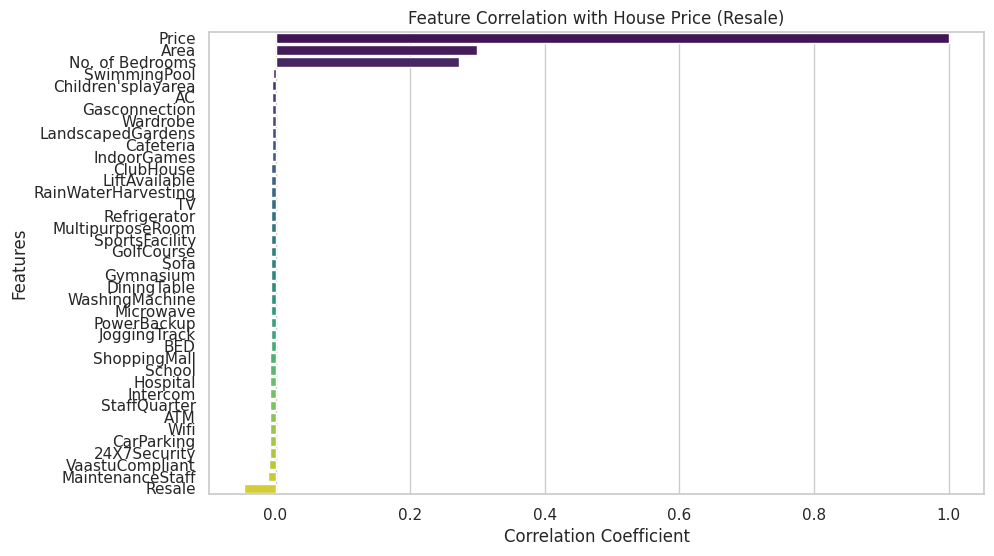

In [ ]:
# Load the Dataset
df = pd.read_csv('/content/Mumbai.csv')

# Get the current column names
current_columns = df.columns.tolist()

# Check the number of columns
print(len(current_columns))

# Rename columns to the new structure if the count matches
# df.columns = ['Location', 'Area', 'No.of.Bedrooms', 'Resale', 'Swimming', 'Gymnassium', 'Golfcourse', 'Proximity_to_Schools', 'Proximity_to_Public_Transport', 'Crime_Rate', 'Energy_Efficiency_Rating', 'Nearby_Parks', 'Internet_Availability']

# Display the first five rows
df.head()

# Calculate the correlation matrix
# Include only numerical features for correlation analysis
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Extract the correlation of each feature with the target variable (Resale)
target_correlation = correlation_matrix['Price'].sort_values(ascending=False)

# Create a DataFrame for better visualization
target_correlation_df = target_correlation.reset_index()
target_correlation_df.columns = ['Feature', 'Correlation with Resale']

# Plot the correlation with the target variable
plt.figure(figsize=(10, 6))
sns.barplot(data=target_correlation_df, x='Correlation with Resale', y='Feature', palette='viridis')
plt.title('Feature Correlation with House Price (Resale)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Proceed with model training and predictions...

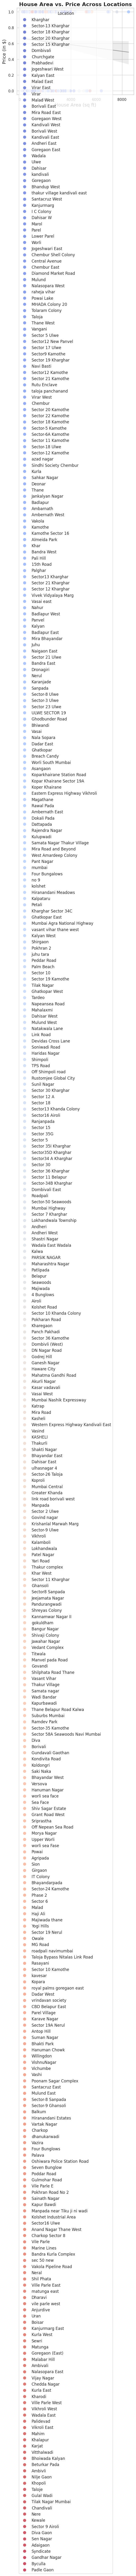

In [ ]:
# Create a scatter plot with regression lines and enhanced visual features
scatter = sns.scatterplot(x='Area', y='Resale', data=df, hue='Location',
                          palette='coolwarm', s=100, edgecolor='w', alpha=0.7)

# Adding a regression line to show trends
sns.regplot(x='Area', y='Resale', data=df, scatter=False, color='gray',
            line_kws={"linewidth":2, 'alpha':0.7})

# Improve the title and labels
plt.title('House Area vs. Price Across Locations', fontsize=16, fontweight='bold')
plt.xlabel('House Area (sq ft)', fontsize=14)
plt.ylabel('Price (in $)', fontsize=14)

# Add a grid for better readability
plt.grid(True)

# Display the legend with better placement and title
plt.legend(title='Location', loc='upper left', fontsize=12)

# Show the plot
plt.show()
